# PHASE 1 GRADED CHALLENGE 3

# **I. INTRODUCTION**

Hello everybody! A warm welcome from me to you, welcome to my notebook. As the author of this notebook, here is my short profile:

* Name : Alexander Prasetyo Christianto
* Age : 23
* Last Education Background : Electrical Engineering
* Occupation : Full Time Data Science Student Batch-001

## 1.1 ABOUT THE DATA

This case requires to develop a customer segmentation to define marketing strategy. The
sample Dataset summarizes the usage behavior of about 4000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

|            **Feature**           |                      **Explanation**                      |  **Measurement** |         **Range**        |
|:-------------------------------- |:--------------------------------------------------------- |:---------------- |:------------------------ |
|              CUST_ID             | Identification of credit card holder                      |     Id number    | Unique                   |
|              BALANCE             | Balance amount left in their account to make purchases    |        USD       | [0 - 18495.55855]        |
|         BALANCE_FREQUENCY        | How frequently the Balance is updated                     |      Range     | 0/1                      |
|             PURCHASES            | Amount of purchases made from account                     |        USD       | [0 - 41050.4]            |
|         ONEOFF_PURCHASES         | Maximum purchases amount done in one-go                   |        USD       | [0 - 40624.06]           |
|       INSTALLMENTS_PURCHASES     | Amount of purchases done in installment                   |        USD       | [0 - 14686.1]            | 
|           CASH_ADVANCE           | Cash in advance given by the user                         |        USD       | [0 - 47137.21176]        |
|       PURCHASES_FREQUENCY        | How frequently the Purchases are being made               |      Range     | 0/1                      |
|    ONEOFF_PURCHASES_FREQUENCY    | How frequently purchases are happening in one-go          |      Range     | 0/1                      |
| PURCHASES_INSTALLMENTS_FREQUENCY | How frequently purchases in installment are being done    |      Range     | 0/1                      |
|      CASH_ADVANCE_FREQUENCY      | How frequently the cash in advance being paid             |     Range      | [0 - 1]                  |
|         CASH_ADVANCE_TRX         | Number of transactions made with 'Cash in Advanced'       |       Count      | [0 - 123]                |
|           PURCHASES_TRX          | Number of purchases transactions made                     |       Count      | [0 - 347]                |
|           CREDIT_LIMIT           | Limit of credit card or user                              |        USD       | [50 - 30,000]            |
|             PAYMENTS             | Amount of payment done by user                            |        USD       | [0 - 50721.48336]        |
|         MINIMUM_PAYMENTS         | Minimum of payment made by user                           |        USD       | [0.019163 - 76406.20752] |
|        PRC_FULL_PAYMENTS         | Percent of full payments made by user                     |     Range      | [0 - 1]                  |
|              TENURE              | Tenure of credit card service for user                    |       Months     | [6 - 12]                 |

## 1.2 OBJECTIVES

Analyze and visualize credit card spending & paying data

Develop a customer segmentation to define strategy for credit card marketing campaign through K-Means clustering

# **II. IMPORT LIBRARIES**

I like my notebook to be neat and tidy, so this section is used for importing all the libraries that I am going to use throughout this project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator, FixedFormatter
import seaborn as sns
import scipy.stats as stats
import sklearn

from statsmodels.stats.outliers_influence import variance_inflation_factor
from feature_engine.outliers import Winsorizer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score, silhouette_samples, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import silhouette_samples



# **III. DATA LOADING**

The following is the query I use to retrieve the data needed for this project.

~~~sql
SELECT *
FROM `ftds-hacktiv8-project.phase1_ftds_001_hck.credit-card-information`
WHERE MOD (CUST_ID,2) = 1
~~~~

Alright, the next step is to load the data into the notebook. I will assign the dataset into a variable named `df`.

In [2]:
df = pd.read_csv('h8dsft_P1G4_AlexanderPrasetyoC.csv')

Here is the preview of the data that I've loaded into my notebook.

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3091,3.833185,0.125,45.00,45.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,500.0,0.000000,NaN,0.0,8
1,5069,0.000000,0.000,176.03,176.03,0.0,0.0,0.125,0.125,0.0,0.0,0,1,7000.0,0.000000,NaN,0.0,8
2,6075,757.964752,0.875,157.40,157.40,0.0,0.0,0.125,0.125,0.0,0.0,0,6,1200.0,1494.480376,2638.598410,0.0,8
3,6291,264.566591,0.375,1150.00,1150.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1200.0,3029.380326,85.428885,0.0,8
4,7755,440.613643,1.000,600.00,600.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1000.0,215.316424,137.846006,0.0,8


In [4]:
df.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4470,2345,9629.808851,1.0,0.0,0.0,0.0,4372.393835,0.000000,0.000000,0.0,0.545455,9,0,12000.0,2468.988022,2134.295731,0.0,11
4471,6785,1040.030221,1.0,0.0,0.0,0.0,1390.648290,0.000000,0.000000,0.0,0.545455,18,0,1400.0,290.129620,287.994171,0.0,11
4472,7347,1322.818587,1.0,0.0,0.0,0.0,762.301096,0.000000,0.000000,0.0,0.545455,11,0,1500.0,1035.627320,312.835530,0.0,11
4473,8447,1060.391273,1.0,0.0,0.0,0.0,1475.858013,0.000000,0.000000,0.0,0.545455,10,0,2000.0,407.360560,277.084736,0.0,11
4474,1995,3447.674222,1.0,205.0,205.0,0.0,4548.057776,0.090909,0.090909,0.0,0.545455,7,1,10500.0,665.239171,817.844662,0.0,11


As far as my eyes can see, I am seeing 4475 rows in the dataset.

# **IV. DATA CLEANING**

As per usual, I will do a dataset cleaning before beginning my analysis and modelling.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

I can see that `MINIMUM_PAYMENTS` doesn't have same rows as other columns. I am going to check it further.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CUST_ID,4475.0,4475.000000,2583.931114,1.000000,2238.000000,4475.000000,6712.000000,8949.00000
BALANCE,4475.0,1563.205717,2072.045789,0.000000,124.432849,871.355430,2047.570799,18495.55855
BALANCE_FREQUENCY,4475.0,0.876933,0.238222,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,4475.0,1003.251343,2060.034730,0.000000,39.560000,360.000000,1102.420000,41050.40000
ONEOFF_PURCHASES,4475.0,596.369893,1653.425984,0.000000,0.000000,45.650000,575.220000,40624.06000
INSTALLMENTS_PURCHASES,4475.0,407.110215,880.799744,0.000000,0.000000,88.620000,455.885000,14686.10000
CASH_ADVANCE,4475.0,984.288554,2060.448056,0.000000,0.000000,0.000000,1138.887754,47137.21176
PURCHASES_FREQUENCY,4475.0,0.490579,0.402907,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,4475.0,0.202301,0.298203,0.000000,0.000000,0.083333,0.250000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,4475.0,0.363886,0.397603,0.000000,0.000000,0.166667,0.750000,1.00000


Upon checking further through using describe on `df`, I found that `CASH_ADVANCE_FREQUENCY` has maximum value of 1.5, which according to data dictionary, it should not be more than 1. So, I am going to change every rows in `CASH_ADVANCE_FREQUENCY` that has value more than 1 to 1.

In [7]:
# change cash_advance_frequency above 1 to 1
CASH_ADV_FREQ_MORE_THAN_1 = df[df['CASH_ADVANCE_FREQUENCY'] > 1].index
df['CASH_ADVANCE_FREQUENCY'].iloc[CASH_ADV_FREQ_MORE_THAN_1] = 1

#check whether there is still cash_advance_frequency above 1
df[df['CASH_ADVANCE_FREQUENCY'] > 1].CASH_ADVANCE_FREQUENCY.any()

C:\Users\alexa\AppData\Local\Temp\ipykernel_17964\3339411908.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CASH_ADVANCE_FREQUENCY'].iloc[CASH_ADV_FREQ_MORE_THAN_1] = 1


False

Back on to the missing values, I am going to check the sum of missing values in each column.

In [8]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    155
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

And yes, turns out that `MINIMUM_PAYMENTS` has missing value in it.

The next step is to handle this missing values, below I have select those rows that has missing value.

In [9]:
df[df.isnull().any(axis=1)]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3091,3.833185,0.125000,45.00,45.00,0.0,0.000000,0.125,0.125,0.0,0.000000,0,1,500.0,0.000000,NaN,0.0,8
1,5069,0.000000,0.000000,176.03,176.03,0.0,0.000000,0.125,0.125,0.0,0.000000,0,1,7000.0,0.000000,NaN,0.0,8
6,8629,0.228572,0.125000,60.00,60.00,0.0,0.000000,0.125,0.125,0.0,0.000000,0,1,1500.0,438.738982,NaN,0.0,8
21,883,1464.324632,1.000000,1174.39,1174.39,0.0,0.000000,0.250,0.250,0.0,0.000000,0,8,9000.0,0.000000,NaN,0.0,12
25,1173,16.887571,0.363636,1083.00,1083.00,0.0,0.000000,0.250,0.250,0.0,0.000000,0,3,1200.0,3905.430817,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4271,2693,19.949534,0.111111,0.00,0.00,0.0,326.731167,0.000,0.000,0.0,0.111111,5,0,2500.0,0.000000,NaN,0.0,9
4272,2813,0.000000,0.000000,0.00,0.00,0.0,253.887233,0.000,0.000,0.0,0.111111,1,0,500.0,2437.932505,NaN,0.0,9
4274,3943,8.187263,0.111111,0.00,0.00,0.0,793.848237,0.000,0.000,0.0,0.111111,1,0,1350.0,0.000000,NaN,0.0,9
4276,5999,25.998899,0.111111,0.00,0.00,0.0,466.387778,0.000,0.000,0.0,0.111111,1,0,4000.0,0.000000,NaN,0.0,9


For imputing `MINIMUM_PAYMENTS` feature, I don't see any column which has relation with this feature and help us estimate values for missing records. It seems that the values are missing at random and we can simply use median to replace the Nan values as the distribution for minimum payments is skewed and hence median gives a better estimation of the central tendency of this feature.

In [10]:
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median())

And now I am going to do the a re-check.

In [11]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

I am also going to check whether there's a duplicated data entry or not.

In [12]:
df.duplicated().sum()

0

The coast is clear, now it is time to make a duplicate of the dataset into a new variable for research purposes.

In [13]:
df_copy = df.copy()

# **V. EXPLORATORY DATA ANALYSIS (EDA)**

In this section, I will do an exploratory data analysis. I will also do an outlier handling because from the previous section I am guessing that the dataset contains a lot of outliers.

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CUST_ID,4475.0,4475.000000,2583.931114,1.000000,2238.000000,4475.000000,6712.000000,8949.00000
BALANCE,4475.0,1563.205717,2072.045789,0.000000,124.432849,871.355430,2047.570799,18495.55855
BALANCE_FREQUENCY,4475.0,0.876933,0.238222,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,4475.0,1003.251343,2060.034730,0.000000,39.560000,360.000000,1102.420000,41050.40000
ONEOFF_PURCHASES,4475.0,596.369893,1653.425984,0.000000,0.000000,45.650000,575.220000,40624.06000
INSTALLMENTS_PURCHASES,4475.0,407.110215,880.799744,0.000000,0.000000,88.620000,455.885000,14686.10000
CASH_ADVANCE,4475.0,984.288554,2060.448056,0.000000,0.000000,0.000000,1138.887754,47137.21176
PURCHASES_FREQUENCY,4475.0,0.490579,0.402907,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,4475.0,0.202301,0.298203,0.000000,0.000000,0.083333,0.250000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,4475.0,0.363886,0.397603,0.000000,0.000000,0.166667,0.750000,1.00000


Looking at the reports we can see that most of the features have mean way greater than their median. This is a sign of some skewness in the dataset and we have to see if we can do something about it.

And it can be seen from the column `CUST_ID` is a column that contains a unique identifier value, so I will delete this column from the dataset because this column will not be useful in doing clustering.

In [15]:
df.drop('CUST_ID', axis=1, inplace=True)

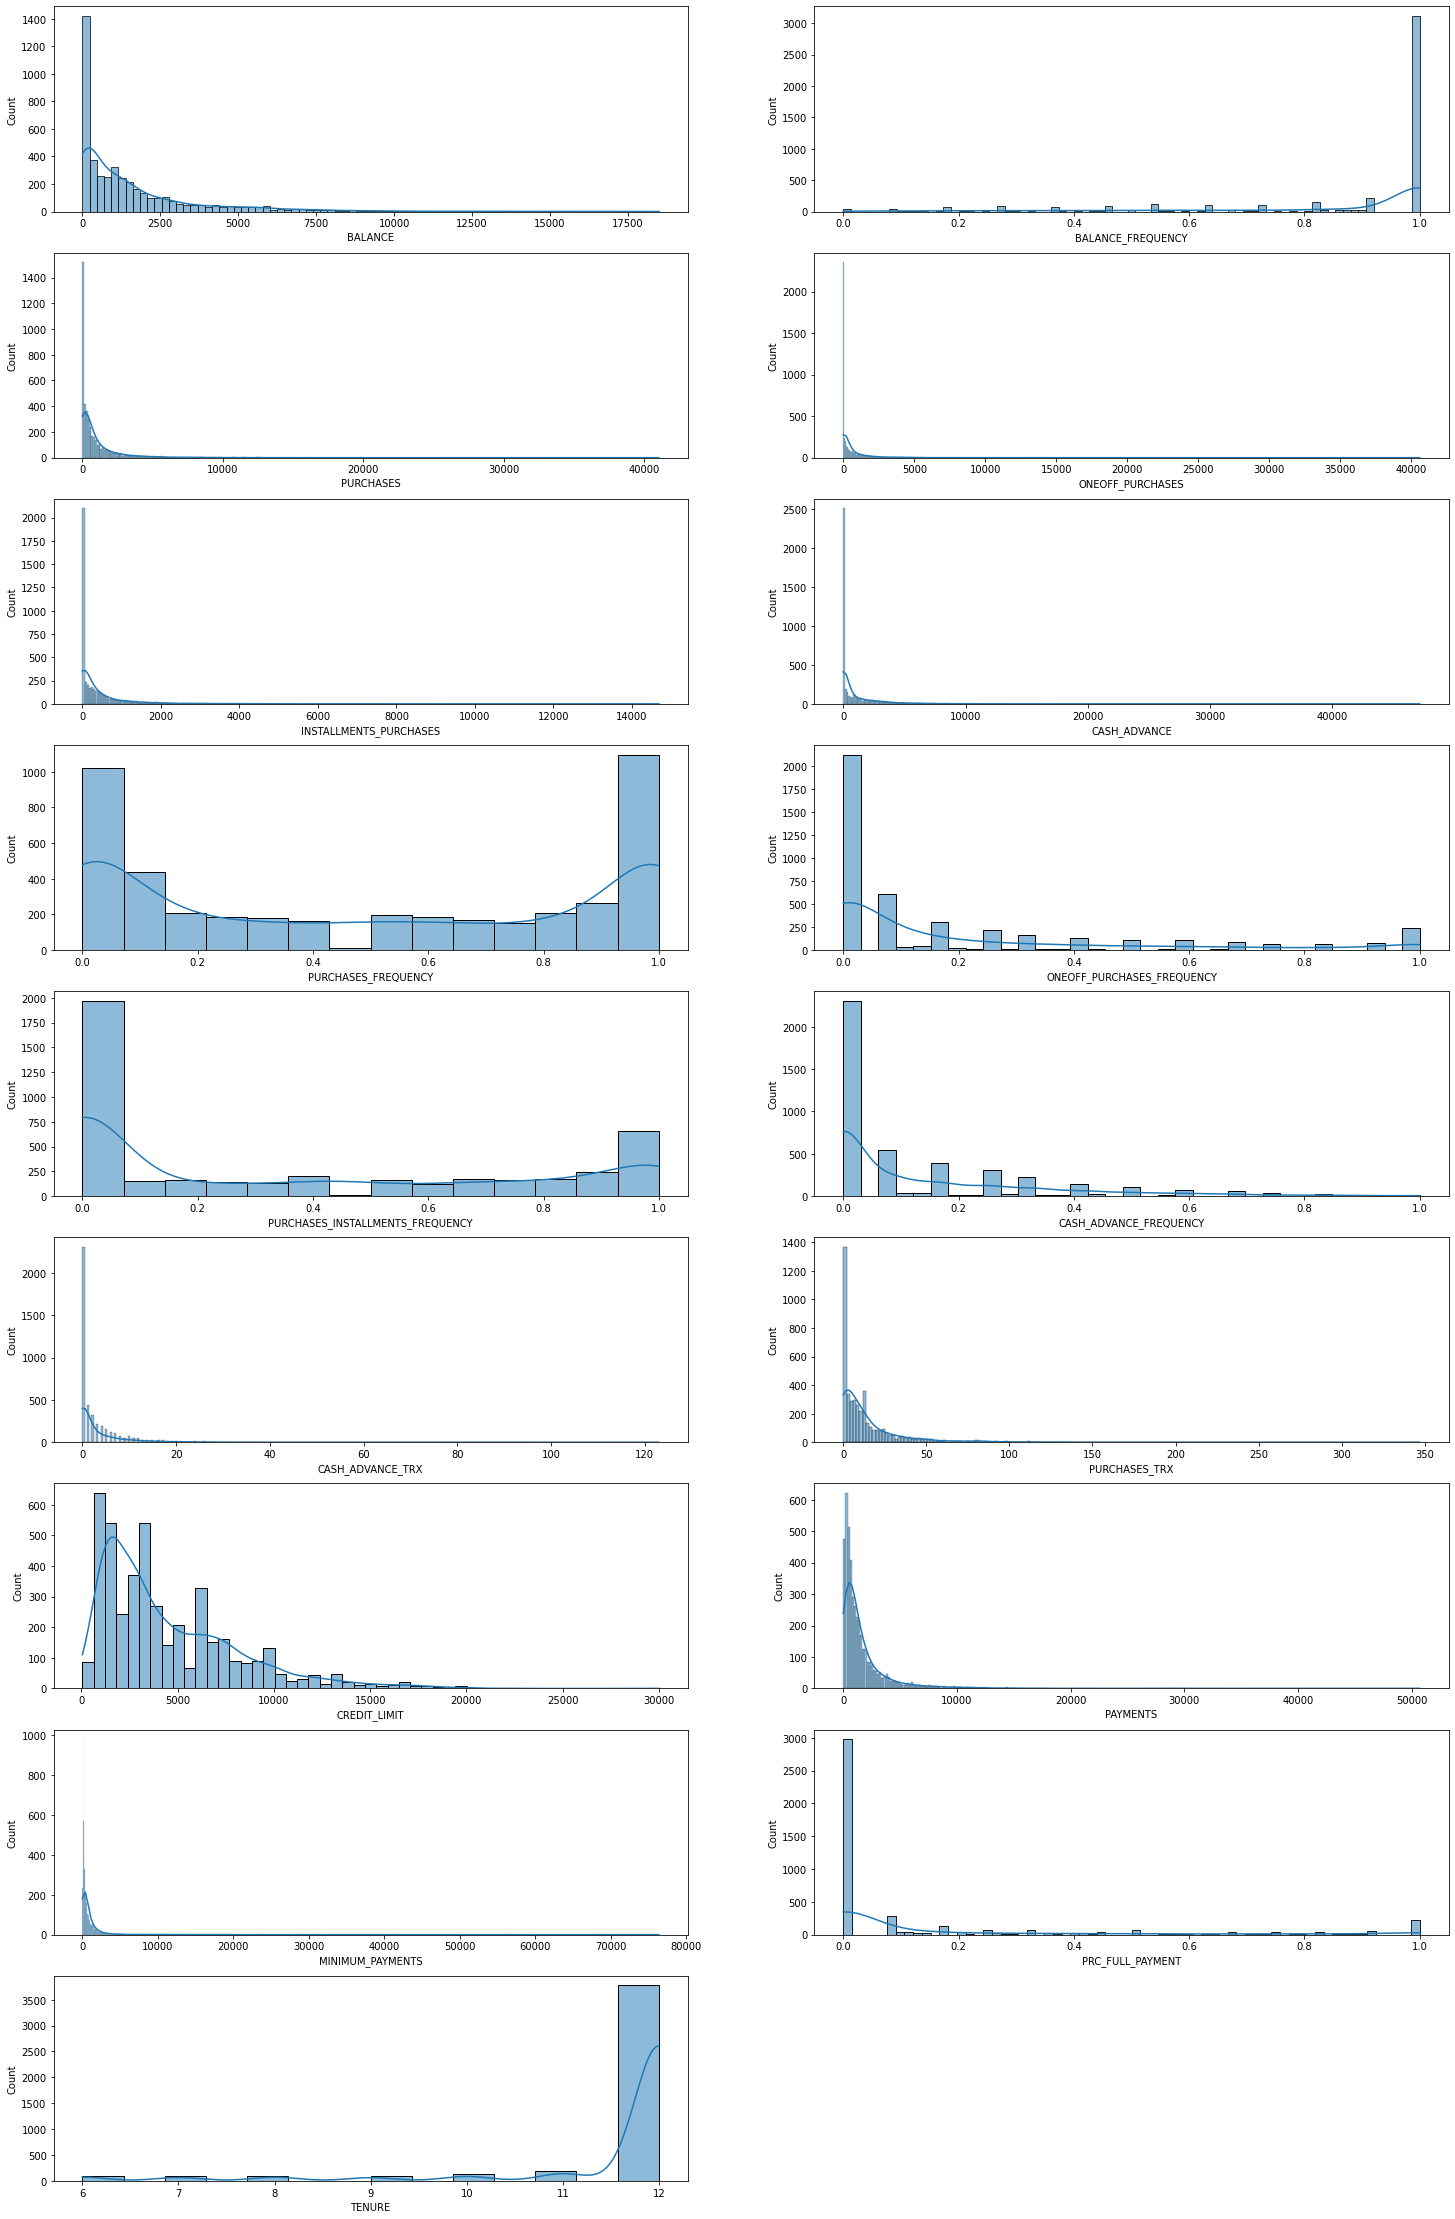

In [16]:
plt.figure(figsize=(25,40))
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.histplot(df[col], ax=ax, kde=True)
        plt.xlabel(col)
        
plt.show()

There is a lot of skewness and they are varied. It is to be expected from datasets like these because there will always be a few customers who conduct a large number of transactions, and vice versa.

Here is the skewness value from each column.

In [17]:
for i, col in enumerate(df.columns):
    print('Skewness Value',(col),':', df[col].skew())

Skewness Value BALANCE : 2.3290088807150915
Skewness Value BALANCE_FREQUENCY : -2.026529776439142
Skewness Value PURCHASES : 7.071705718331177
Skewness Value ONEOFF_PURCHASES : 9.951056583113456
Skewness Value INSTALLMENTS_PURCHASES : 6.330629906494809
Skewness Value CASH_ADVANCE : 5.638109294257693
Skewness Value PURCHASES_FREQUENCY : 0.05875497991848613
Skewness Value ONEOFF_PURCHASES_FREQUENCY : 1.5483193819148602
Skewness Value PURCHASES_INSTALLMENTS_FREQUENCY : 0.5082957786202944
Skewness Value CASH_ADVANCE_FREQUENCY : 1.7694152361662445
Skewness Value CASH_ADVANCE_TRX : 6.420103784668197
Skewness Value PURCHASES_TRX : 4.747507133980154
Skewness Value CREDIT_LIMIT : 1.498947716941148
Skewness Value PAYMENTS : 5.747503259811283
Skewness Value MINIMUM_PAYMENTS : 14.913415253196789
Skewness Value PRC_FULL_PAYMENT : 1.9752382754788178
Skewness Value TENURE : -2.954158581529189


Almost all of the data distribution columns are skewed with a fairly large skew value (< -1 and > 1). Also, there are only 2 columns with normal distribution, namely `PURCHASES_FREQUENCY` and `PURCHASES_INSTALLMENTS_FREQUENCY`.

For a clustering problem, it is now up to our application whether we want to handle the skewness in our dataset. For example, if we want to do clustering for anomaly detection, we don't want to handle outliers because we want our model to detect and group them in a cluster. I'm looking for a good visualization for our application, so I'd like to handle the skewness as much as possible because it will help the model form better clusters.

# **VI. DATA PREPROCESSING**

In this section I will perform feature selection for making the machine learning models, and then making the inference model, splitting the data into train and test data, scale the numerical features and then concat the features back.

## 6.1 DATA SPLITTING

I am going to split my data into proportion of 80% train and 20% test.

In [18]:
train, test = train_test_split(df, test_size=0.2, random_state=1)

print('Train size: ', train.shape)
print('Test size: ', test.shape)

Train size:  (3580, 17)
Test size:  (895, 17)


## 6.2 OUTLIERS HANDLING

In [19]:
def find_normal_bound(data, feature):
    normal_lower_bound = data[feature].mean() - 3 * data[feature].std()
    normal_upper_bound = data[feature].mean() + 3 * data[feature].std()

    return normal_lower_bound, normal_upper_bound

def find_skew_bound(data, feature, cons):
    IQR = data[feature].quantile(0.75) - data[feature].quantile(0.25)

    skew_lower_bound = data[feature].quantile(0.25) - (IQR * cons)
    skew_upper_bound = data[feature].quantile(0.75) + (IQR * cons)

    return skew_lower_bound, skew_upper_bound

Columns with normal distribution, namely `PURCHASES_FREQUENCY` and `PURCHASES_INSTALLMENTS_FREQUENCY` have no outliers. Then for the `TENURE` column because if I do outlier handling it will uniform all values, so I decided not to handle outliers in this column.

The column I will handle the outliers are :
`BALANCE`, `BALANCE_FREQUENCY`, `PURCHASES`, `ONEOFF_PURCHASES`, `INSTALLMENTS_PURCHASES`, `CASH_ADVANCE`, `CASH_ADVANCE_FREQUENCY`, `CASH_ADVANCE_TRX`, `PURCHASES_TRX`, `CREDIT_LIMIT`, `PAYMENTS`, `MINIMUM_PAYMENTS`, `PRC_FULL_PAYMENT`.

In [20]:
capper = Winsorizer(capping_method='iqr',
                                tail='both',
                                fold=3,
                                variables=
                                ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
                                'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
                                'CASH_ADVANCE', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX',
                                'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
                                'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT'])
capper.fit(train)
train_clean = capper.transform(train)

Here is the visualization after the outliers are handled.

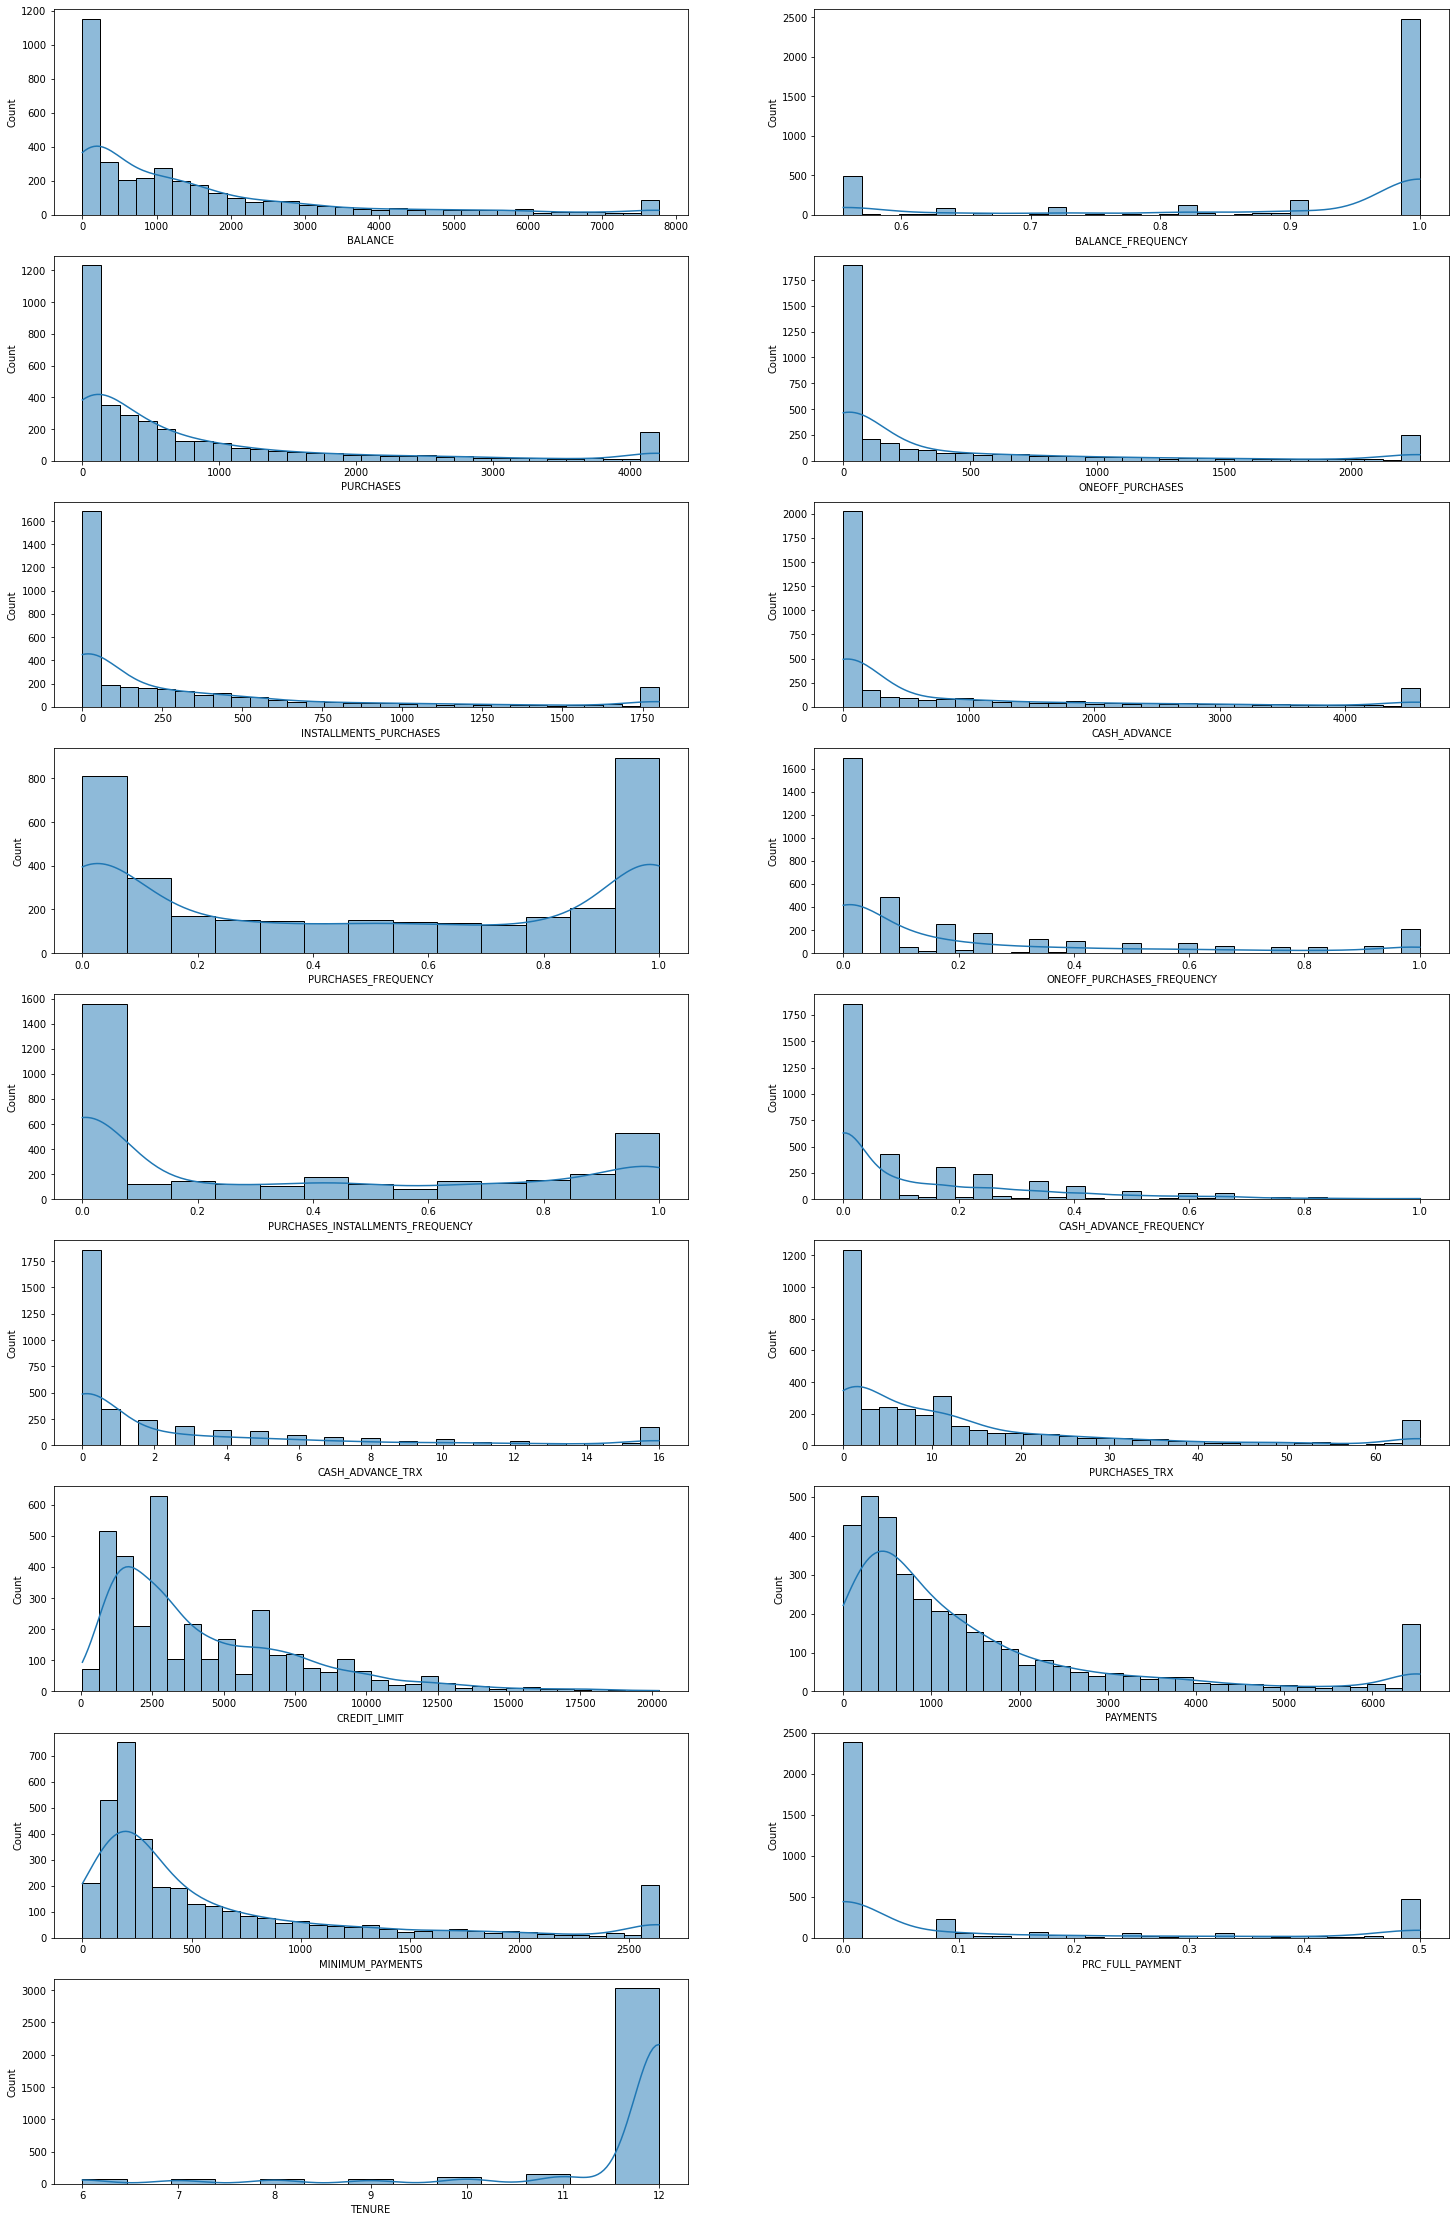

In [21]:
plt.figure(figsize=(25,40))
for i, col in enumerate(train_clean.columns):
    if train_clean[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.histplot(train_clean[col], ax=ax, kde=True)
        plt.xlabel(col)
        
plt.show()

## 6.3 FEATURE SCALING

After handling the outliers, the next step is to scale the numerical features in the dataset.

In [22]:
scaler = StandardScaler()
scaler.fit(train_clean)

train_scaled = scaler.transform(train_clean)

train_scaled

array([[ 1.02603444,  0.58088051,  2.96302442, ...,  0.25641248,
        -0.58733581,  0.36102243],
       [ 0.36897019,  0.58088051, -0.73370896, ...,  0.1217001 ,
        -0.12526516,  0.36102243],
       [-0.51942672,  0.58088051,  2.96302442, ...,  0.04747928,
         1.72302856,  0.36102243],
       ...,
       [-0.46379526,  0.58088051,  1.44110867, ..., -0.46377043,
        -0.12526516,  0.36102243],
       [ 2.7517718 ,  0.58088051,  2.96302442, ...,  2.85033532,
        -0.12526516,  0.36102243],
       [-0.49664649,  0.58088051, -0.45273611, ..., -0.61737409,
        -0.58733581,  0.36102243]])

In [23]:
train_scaled_df = pd.DataFrame(train_scaled)
train_scaled_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.026034,0.580881,2.963024,2.681012,-0.478421,-0.614738,0.842147,1.539375,-0.497901,-0.682145,-0.628788,0.402393,1.836655,1.414538,0.256412,-0.587336,0.361022
1,0.368970,0.580881,-0.733709,-0.620297,-0.668131,1.397755,-1.224717,-0.677438,-0.917560,0.153071,0.270198,-0.779272,-0.406474,1.137353,0.121700,-0.125265,0.361022
2,-0.519427,0.580881,2.963024,2.681012,0.505599,-0.614738,1.048835,1.539375,-0.497901,-0.682145,-0.628788,0.047894,-0.967256,2.977512,0.047479,1.723029,0.361022
3,-0.752230,-0.539845,-0.733709,-0.620297,-0.668131,-0.291087,-1.224717,-0.677438,-0.917560,0.988282,0.494945,-0.779272,1.696459,-0.509925,-0.712866,1.260952,0.361022
4,-0.738100,0.580881,0.280427,-0.620297,1.657941,-0.614738,0.842147,-0.677438,1.180728,-0.682145,-0.628788,-0.188439,-0.154122,-0.086402,-0.662942,2.185099,0.361022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3575,-0.800794,-2.158671,-0.733709,-0.620297,-0.668131,1.440240,-1.224717,-0.677438,-0.917560,-0.264540,-0.404042,-0.779272,0.434699,2.977512,-0.879653,2.185099,0.361022
3576,1.825138,0.580881,0.057774,0.318878,-0.153878,2.784965,0.325431,0.569518,-0.288073,3.702731,2.967158,-0.247523,2.117046,2.977512,0.547432,-0.587336,-2.653462
3577,-0.463795,0.580881,1.441109,2.681012,-0.360969,-0.614738,1.255521,2.647779,1.390559,-0.682145,-0.628788,1.524975,0.715090,0.397639,-0.463770,-0.125265,0.361022
3578,2.751772,0.580881,2.963024,2.681012,2.958950,1.449946,1.255521,1.262271,1.600387,0.153071,2.517665,3.061140,3.238610,2.977512,2.850335,-0.125265,0.361022


And that is it, all the numerical features are scaled using StandardScaler.

## 6.4 FEATURE SELECTION

In [24]:
vif_data = pd.DataFrame()
vif_data['feature'] = train_scaled_df.columns

vif_data['VIF'] = [variance_inflation_factor(train_scaled_df.values, i) for i in range(len(train_scaled_df.columns))]

vif_data

,feature,VIF
0,0,4.928094
1,1,1.382707
2,2,19.638555
3,3,12.268265
4,4,6.951022
5,5,3.437764
6,6,11.252356
7,7,6.035995
8,8,12.146442
9,9,6.584300


Based on the results of the multicollinearity test using the variance inflation factor (VIF), it can be seen that there are 9 components or features that get a score above 5, meaning that these features have a high multicollinearity value. Furthermore, to perform dimension reduction, the results will be matched with the results of the principal component analysis (PCA).

## 6.5 PRINCIPAL COMPONEN ANALYSIS (PCA)

In [25]:
pca_scaled=PCA(n_components=17).fit(train_scaled)
pca_scaled.explained_variance_ratio_

array([0.30090634, 0.23932508, 0.09023249, 0.07664791, 0.06254277,
       0.0511724 , 0.04210592, 0.03269725, 0.02776699, 0.02171454,
       0.01430839, 0.01395998, 0.00970415, 0.00807015, 0.00466545,
       0.00263352, 0.00154666])

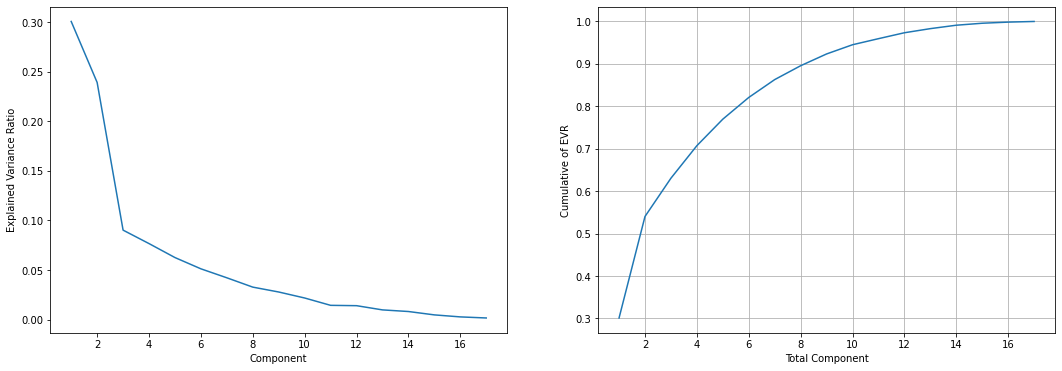

In [26]:
fig,ax=plt.subplots(ncols=2, figsize=(18, 6))
plt.grid()
ax[0].plot(range(1,18), pca_scaled.explained_variance_ratio_)
ax[0].set_xlabel('Component')
ax[0].set_ylabel('Explained Variance Ratio')

ax[1].plot(range(1,18), np.cumsum(pca_scaled.explained_variance_ratio_))
ax[1].set_xlabel('Total Component')
ax[1].set_ylabel('Cumulative of EVR')

plt.show()

Based on the results of the variance ratio on PCA, it can be seen that the optimal component value is 0.9. This can be seen in the curve that has not experienced a significant change at the value of 0.9.

Previously, a multicollinearity test was carried out using the variance inflation factor (VIF) which stated that there were 9 components with high multicollinearity values.

I decided to use 8 total component to be used on the clustering model.

In [27]:
pca = PCA(n_components=8)
train_pca = pca.fit_transform(train_scaled)

# **VII. MACHINE LEARNING MODELS**

## 7.1 K-MEAN

### 7.1.1 FINDING OPTIMUM K USING ELBOW METHOD

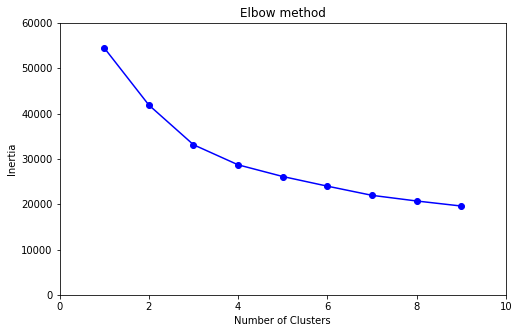

In [28]:
kmeans_models = [KMeans(n_clusters=k, max_iter=500, random_state=42).fit(train_pca) for k in range (1, 10)]
inertia = [model.inertia_ for model in kmeans_models]

plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), inertia, 'bo-')
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.axis([0, 10, 0, 60000]);

### 7.1.2 FINDING OPTIMUM K USING SILHOUTTE SCORE

In [29]:
silhouette_scores = [silhouette_score(train_pca, model.labels_)
                     for model in kmeans_models[1:]]

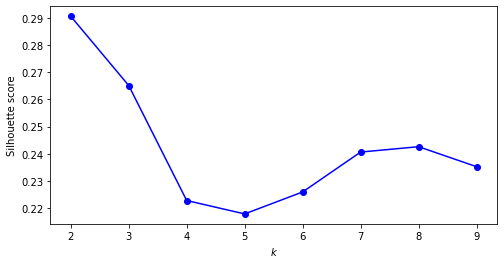

In [30]:
plt.figure(figsize=(8, 4))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel('$k$')
plt.ylabel('Silhouette score')
plt.show()

Based on the graph of the elbow method, the most significant inertia reduction is at position K equal to 3. But, I will try to use the silhouette score method to ensure the most optimal number of clusters.

In [31]:
# silhouette_scores = [] 
# for n_cluster in range(2, 8):
#     silhouette_scores.append(   
#         silhouette_score(train_pca, KMeans(n_clusters = n_cluster).fit_predict(train_pca))) 
#     
# k = [2, 3, 4, 5, 6,7] 
# plt.bar(k, silhouette_scores) 
# plt.xlabel('Number of clusters', fontsize = 10) 
# plt.ylabel('Silhouette Score', fontsize = 10) 
# plt.show()  

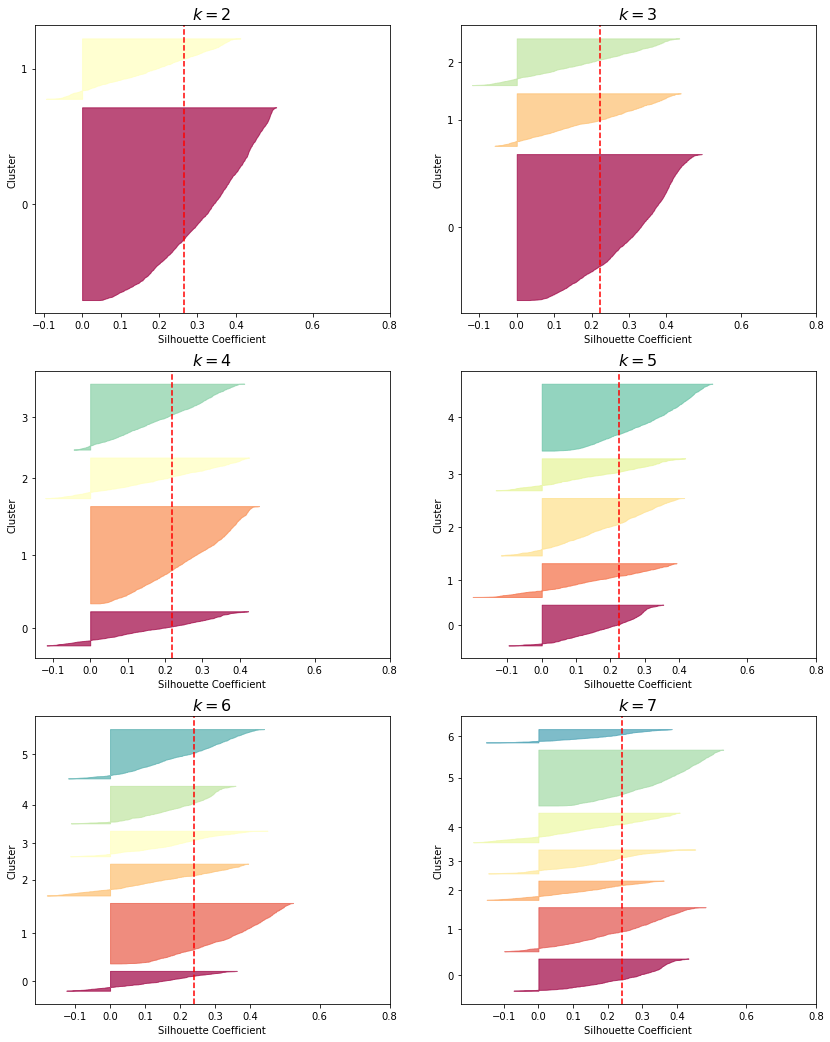

In [32]:
plt.figure(figsize=(14, 18))

for k in (2, 3, 4, 5, 6, 7):
    plt.subplot(3, 2, k - 1)
    
    y_pred = kmeans_models[k-1].labels_
    silhouette_coefficients = silhouette_samples(train_pca, y_pred)

    padding = len(train_pca) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (2, 3, 4, 5, 6, 7):
        plt.ylabel("Cluster")
    
    if k in (2, 3, 4, 5, 6, 7):
        plt.gca().set_xticks([-0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.6, 0.8])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k-1], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)
plt.show()

Based on graphs of silhouette score, it was found that cluster 3 had experienced an insignificant decrease in value. 

Based on the results of thecalculation on the silhouette method, it can be seen that none of the clusters has the same shape, eventhough all of them have passed the silhouette score. However, when viewed more closely, cluster 3 andcluster 4 have better results than other clusters. When compared between the two clusters, cluster 3 willproduce a model with less overlap because the silhouette graph shows that there are fewer classes withvalues below 0 than in cluster 4. Therefore, it was decided to use 3 clusters for K-Mean modeling.

### 7.1.3 MODEL DEFINITION

In [33]:
kmeans = KMeans(n_clusters=3, max_iter=500, random_state=1)
kmeans.fit(train_pca)

KMeans(max_iter=500, n_clusters=3, random_state=1)

### 7.1.4 MODEL VISUALIZATION

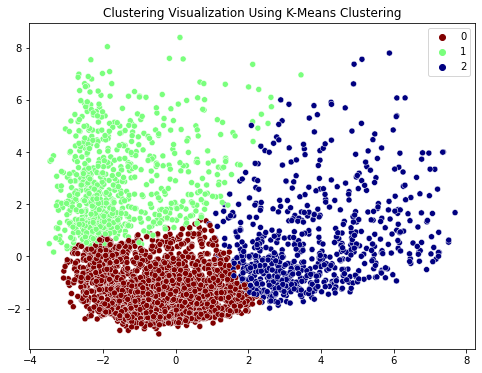

In [34]:
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(x=train_pca[:,0], y=train_pca[:,1], hue=kmeans.labels_, palette='jet_r')
ax.set_title('Clustering Visualization Using K-Means Clustering');

Based on the results of plotting the K-Means clustering model, the results are quite good. The boundaries of the three clusters are clearly visible, and there is not much overlap between clusters.

## 7.2 AGGLOMERATIVE CLUSTERING

In [35]:
agg = AgglomerativeClustering(n_clusters=3, linkage='ward')
agg.fit(train_pca)

AgglomerativeClustering(n_clusters=3)

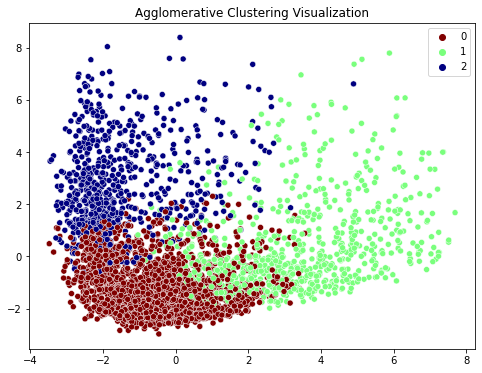

In [36]:
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(x=train_pca[:,0], y=train_pca[:,1], hue=agg.labels_, palette='jet_r')
ax.set_title('Agglomerative Clustering Visualization');

The results of plotting on the agglomerative clustering model show clusters with clearly visible boundaries between clusters. But the boundaries between cluster is not so good when compared to K-Means model. After this I will try one more clustering model which is Spectral Clustering to give me more comparison.

## 7.3 SPECTRAL CLUSTERING

In [37]:
scl = SpectralClustering(n_clusters=3, affinity='nearest_neighbors')
scl.fit(train_pca)

SpectralClustering(affinity='nearest_neighbors', n_clusters=3)

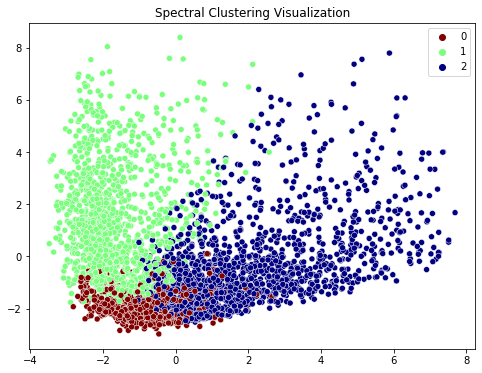

In [38]:
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(x=train_pca[:,0], y=train_pca[:,1], hue=scl.labels_, palette='jet_r')
ax.set_title('Spectral Clustering Visualization');

The results of plotting on the spectral clustering method show a model with boundaries between clusters that can still be seen. However, the number of overlapping data between clusters that occurs is more when compared to the previous K-Means model.

In general, when viewed from the results of the distribution of class data on the results of the model visualization that has been carried out, so far the K-Means model provides better performance than the other two clustering methods. We will see further comparisons on the evaluation model that will be carried out using the calculation of the Silhouette Score, Davies Bouldin Score, and Calinski-Harbasz Score, and then compare the results.

## 7.4 TRAINED MODEL SCORE COMPARISON

In [39]:
result_comp = pd.DataFrame({'Model' : ['K-Means', 'Agglomerative', 'Spectral'],
                  'Silhouete Score' : [silhouette_score(train_pca, kmeans.labels_), silhouette_score(train_pca, agg.labels_), silhouette_score(train_pca, scl.labels_)],
                  'Davies Score' : [davies_bouldin_score(train_pca, kmeans.labels_), davies_bouldin_score(train_pca, agg.labels_), davies_bouldin_score(train_pca, scl.labels_)],
                  'Calinski Score' : [calinski_harabasz_score(train_pca, kmeans.labels_), calinski_harabasz_score(train_pca, agg.labels_), calinski_harabasz_score(train_pca, scl.labels_)]})
result_comp

,Model,Silhouete Score,Davies Score,Calinski Score
0,K-Means,0.265633,1.365129,1154.562683
1,Agglomerative,0.241254,1.445284,1000.086174
2,Spectral,0.161411,1.538419,794.086845


The silhouette score on the k-means model is 0.265633, while the spectral model is 0.161559, and the agglomerative model is 0.241254. Then the Davies score on the k-means model is 1.365129, while the spectral model is 1.53866, and the agglomerative model is 1.445284. The calinski-harabasz score in the k-means model is 1154.562683, while the spectral model is 793.723590, and the agglomerative model is 1000.086174.

Based on the evaluation results, k-means clustering is the model with the best performance in two evaluation calculations, namely silhouette and calinski-harabasz score. While the Davies Score calculation, the best model is obtained by the agglomerative clustering model.

In addition, the results of this calculation are also supported by the results of cluster visualization in each model which shows that k-means clustering is a clustering model with the clearest boundaries between clusters and only very little data overlap between clusters.

# **VIII. ML MODELS TEST**

And now it is time to test the model using test data. But, before that, it will be cleaned from outliers, scaled and PCA.

In [40]:
test_cleaned = capper.transform(test)

In [41]:
test_cleaned_scaled = scaler.transform(test_cleaned)

In [42]:
test_pca = pca.transform(test_cleaned_scaled)

## 8.1 KMEANS TEST

In [43]:
kmeans_test = KMeans(n_clusters=3, max_iter=500, random_state=1)
kmeans_test.fit(test_pca)

KMeans(max_iter=500, n_clusters=3, random_state=1)

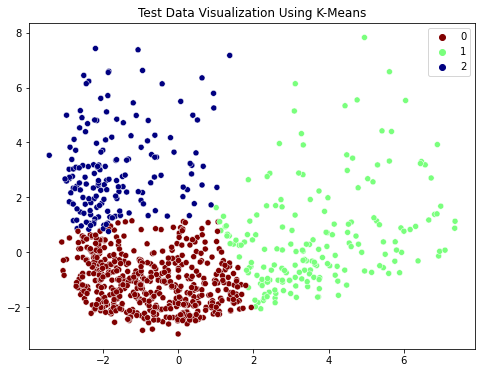

In [44]:
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(x=test_pca[:,0], y=test_pca[:,1], hue=kmeans_test.labels_, palette='jet_r')
ax.set_title('Test Data Visualization Using K-Means');

It can be seen from the graph above that, it has the same cluster as training K-Means model. But, weirdly enough, the label colors are not the same as the K-Means training model. I have tried to fix and re-run the code but nothing came up to fix this problem.

# **IX. EXPLORATORY DATA ANALYSIS BASED ON CLUSTERING RESULT**

## 10.1. CONCATENATING CLUSTERING RESULT INTO ORIGINAL DATA

Now, I will concatenate the train and test label from the K-Mean model to train and test data and then merge the train and test data back into one piece so I can analyze the characteristics of the cluster.

In [45]:
train['cluster_id'] = kmeans.labels_
test['cluster_id'] = kmeans_test.labels_

In [46]:
clust_df = pd.concat([train, test], axis=0, ignore_index=True)
clust_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_id
0,3433.295973,1.000000,4342.07,4247.87,94.20,0.000000,0.833333,0.666667,0.166667,0.000000,0,20,11000.0,3903.861413,806.987100,0.000000,12,2
1,2201.533726,1.000000,0.00,0.00,0.00,2719.782919,0.000000,0.000000,0.000000,0.166667,4,0,3000.0,3436.911086,711.894455,0.083333,12,1
2,536.104848,1.000000,8591.31,8008.50,582.81,0.000000,0.916667,0.666667,0.166667,0.000000,0,14,1000.0,8390.497243,659.502436,0.416667,12,2
3,99.680638,0.818182,0.00,0.00,0.00,437.399211,0.000000,0.000000,0.000000,0.333333,5,0,10500.0,661.878770,122.779423,0.333333,12,0
4,126.169985,1.000000,1155.00,0.00,1155.00,0.000000,0.833333,0.000000,0.833333,0.000000,0,10,3900.0,1375.353007,158.020499,0.909091,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,31.980197,0.727273,300.00,0.00,300.00,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,7500.0,214.796949,99.124898,0.000000,12,0
4471,2719.639153,1.000000,715.81,715.81,0.00,0.000000,0.333333,0.333333,0.000000,0.000000,0,7,10000.0,694.102974,724.758705,0.000000,12,0
4472,32.726042,0.636364,303.51,303.51,0.00,0.000000,0.333333,0.333333,0.000000,0.000000,0,5,1200.0,550.181692,100.810197,0.666667,12,0
4473,497.787017,1.000000,114.54,114.54,0.00,1573.646488,0.083333,0.083333,0.000000,0.166667,2,1,1000.0,2060.331720,220.633128,0.166667,12,0


## 10.2. VISUALIZATION FROM EACH COLUMN BASED ON THE CLUSTER

Here is the visualization of cluster distribution in the dataset.

[Text(0, 0, '2672'), Text(0, 0, '953'), Text(0, 0, '850')]

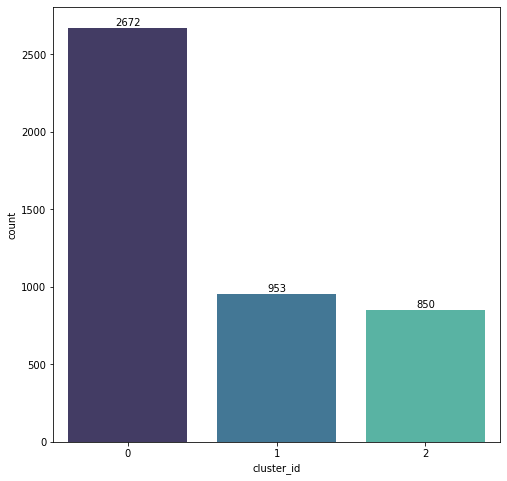

In [47]:
plt.figure(figsize=(8,8))
ax = sns.countplot(data=clust_df, x='cluster_id', palette='mako')
ax.bar_label(ax.containers[0], label_type='edge')

Cluster 0 dominates the dataset, followed by cluster 1 and cluster 2.

c:\Users\alexa\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


<Figure size 864x864 with 0 Axes>

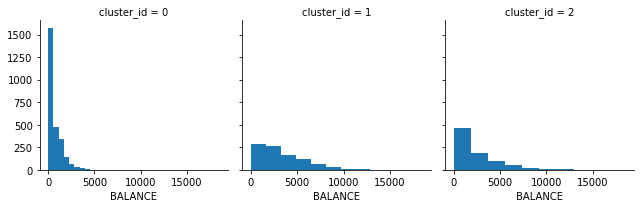

<Figure size 864x864 with 0 Axes>

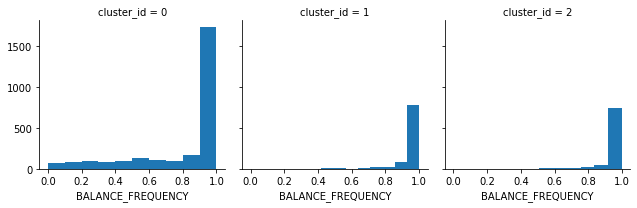

<Figure size 864x864 with 0 Axes>

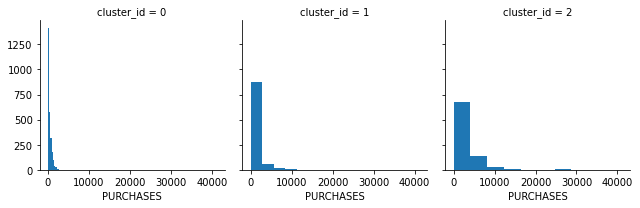

<Figure size 864x864 with 0 Axes>

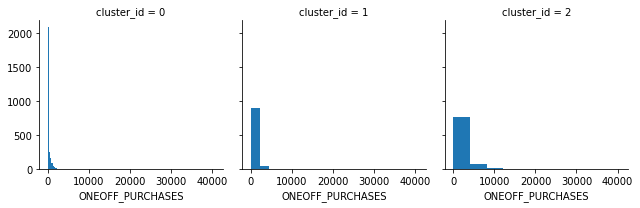

<Figure size 864x864 with 0 Axes>

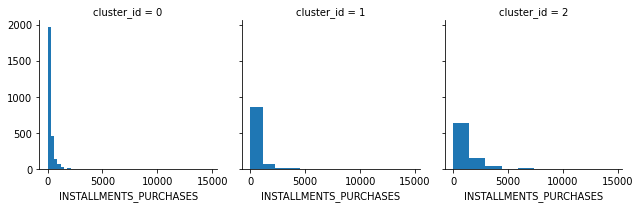

<Figure size 864x864 with 0 Axes>

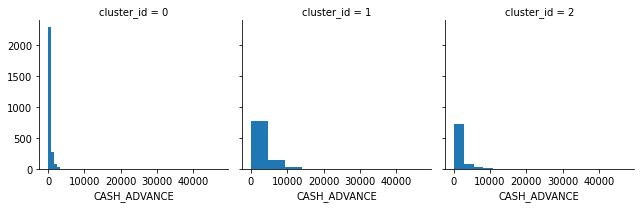

<Figure size 864x864 with 0 Axes>

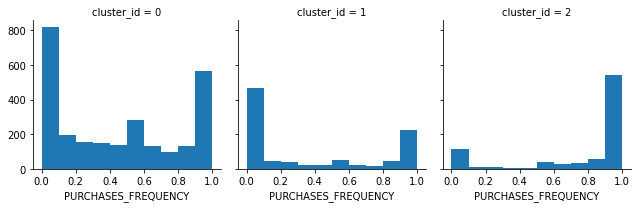

<Figure size 864x864 with 0 Axes>

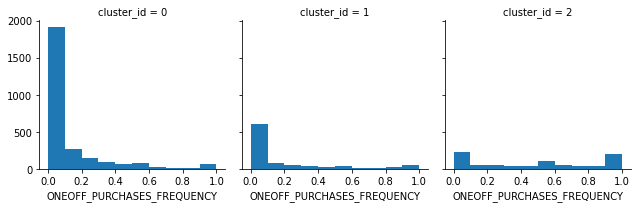

<Figure size 864x864 with 0 Axes>

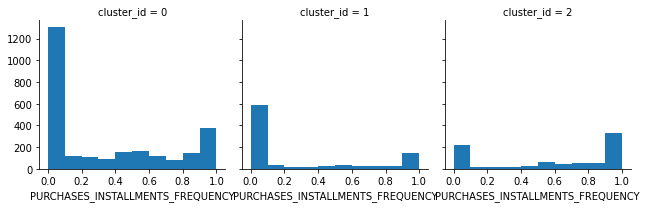

<Figure size 864x864 with 0 Axes>

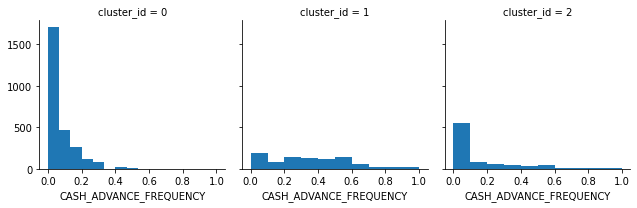

<Figure size 864x864 with 0 Axes>

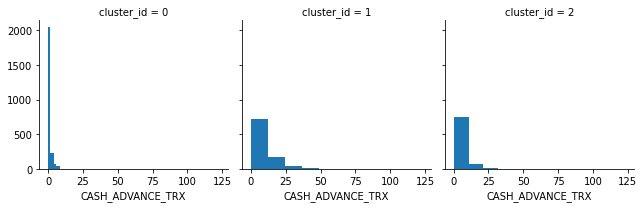

<Figure size 864x864 with 0 Axes>

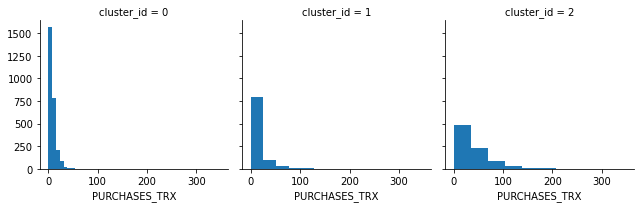

<Figure size 864x864 with 0 Axes>

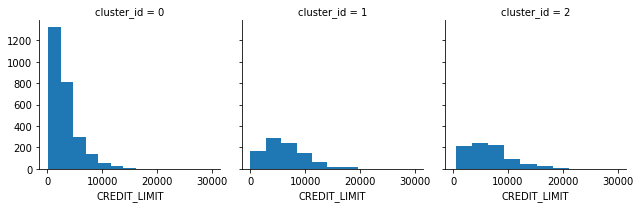

<Figure size 864x864 with 0 Axes>

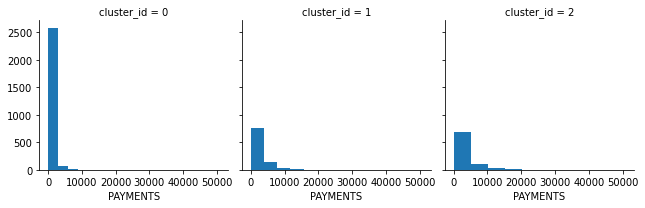

<Figure size 864x864 with 0 Axes>

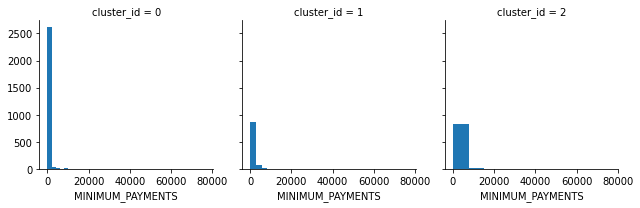

<Figure size 864x864 with 0 Axes>

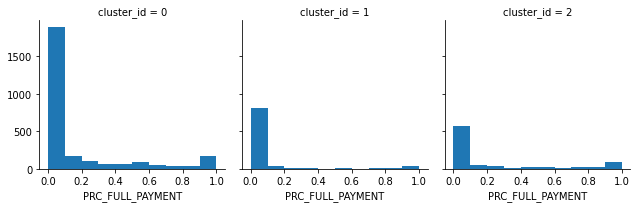

<Figure size 864x864 with 0 Axes>

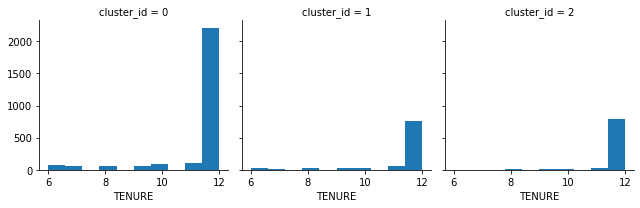

<Figure size 864x864 with 0 Axes>

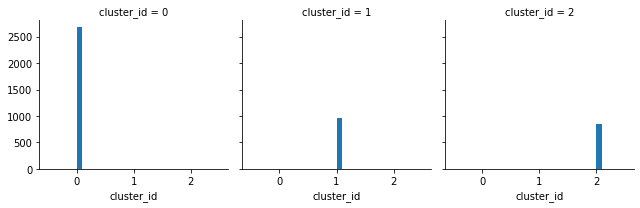

In [48]:
for cols in clust_df:
    g = sns.FacetGrid(clust_df, col = 'cluster_id')
    plt.figure(figsize=(12,12))
    g.map(plt.hist, cols)

In [49]:
clust_df[clust_df['cluster_id'] == 0].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,2672.0,668.028620,825.870882,0.000000,43.914334,292.532226,1098.697188,5686.466725
BALANCE_FREQUENCY,2672.0,0.816880,0.281236,0.000000,0.666667,1.000000,1.000000,1.000000
PURCHASES,2672.0,406.706789,447.953304,0.000000,55.617500,269.545000,604.895000,3000.000000
ONEOFF_PURCHASES,2672.0,200.839057,379.590988,0.000000,0.000000,0.000000,224.502500,2953.030000
INSTALLMENTS_PURCHASES,2672.0,206.013316,307.752564,0.000000,0.000000,63.360000,320.980000,3000.000000
CASH_ADVANCE,2672.0,268.086147,557.427840,0.000000,0.000000,0.000000,261.412232,7894.578816
PURCHASES_FREQUENCY,2672.0,0.443514,0.372335,0.000000,0.083333,0.416667,0.833333,1.000000
ONEOFF_PURCHASES_FREQUENCY,2672.0,0.117524,0.207134,0.000000,0.000000,0.000000,0.166667,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,2672.0,0.326773,0.373933,0.000000,0.000000,0.166667,0.666667,1.000000
CASH_ADVANCE_FREQUENCY,2672.0,0.059629,0.098331,0.000000,0.000000,0.000000,0.083333,0.666667


In [50]:
clust_df[clust_df['cluster_id'] == 1].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,953.0,3307.000432,2574.752003,12.423203,1370.317105,2692.671422,4802.507595,16115.59640
BALANCE_FREQUENCY,953.0,0.960139,0.109365,0.272727,1.000000,1.000000,1.000000,1.00000
PURCHASES,953.0,921.998804,2059.079230,0.000000,0.000000,149.800000,1062.630000,27957.68000
ONEOFF_PURCHASES,953.0,538.529108,1447.816811,0.000000,0.000000,0.000000,463.040000,23032.97000
INSTALLMENTS_PURCHASES,953.0,383.506128,910.625163,0.000000,0.000000,0.000000,396.000000,11423.44000
CASH_ADVANCE,953.0,2799.088674,3007.245087,0.000000,722.361498,2260.076139,3853.339512,47137.21176
PURCHASES_FREQUENCY,953.0,0.364903,0.412672,0.000000,0.000000,0.125000,0.833333,1.00000
ONEOFF_PURCHASES_FREQUENCY,953.0,0.187003,0.288435,0.000000,0.000000,0.000000,0.250000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,953.0,0.265503,0.381170,0.000000,0.000000,0.000000,0.583333,1.00000
CASH_ADVANCE_FREQUENCY,953.0,0.346815,0.242272,0.000000,0.166667,0.333333,0.500000,1.00000


In [51]:
clust_df[clust_df['cluster_id'] == 2].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,850.0,2422.119642,2524.197368,1.632453,504.132946,1565.503652,3534.126838,18495.55855
BALANCE_FREQUENCY,850.0,0.972424,0.092522,0.181818,1.000000,1.000000,1.000000,1.00000
PURCHASES,850.0,2969.605129,3461.127265,0.000000,1226.155000,2211.475000,3661.002500,41050.40000
ONEOFF_PURCHASES,850.0,1904.582435,3064.820759,0.000000,230.875000,1136.530000,2425.677500,40624.06000
INSTALLMENTS_PURCHASES,850.0,1065.728576,1516.015139,0.000000,51.500000,662.275000,1491.755000,14686.10000
CASH_ADVANCE,850.0,1200.980692,2428.127088,0.000000,0.000000,0.000000,1636.569704,27296.48576
PURCHASES_FREQUENCY,850.0,0.779436,0.346571,0.000000,0.732955,1.000000,1.000000,1.00000
ONEOFF_PURCHASES_FREQUENCY,850.0,0.485955,0.370009,0.000000,0.083333,0.500000,0.833333,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,850.0,0.590855,0.404336,0.000000,0.083333,0.750000,1.000000,1.00000
CASH_ADVANCE_FREQUENCY,850.0,0.138989,0.213535,0.000000,0.000000,0.000000,0.250000,1.00000


## 10.3. ANALYSIS OF THE NEW DATA LABELED WITH CLUSTERS

Here is the details of the analysis from the graphs that was shown in section 10.2

---

Cluster 0<br>

Characteristic :

- Balance left in their account up to 5600 USD
- Loves to check their balance
- Value of each purchases is rather small.
- Their purchase frequency is high
- Their value of oneoff purchases is very small and rarely
- Frequently spend their money for installment purchases but in small amount of money
- Rarely using cash advance method
- Their credit limit goes up to 23000 USD
- Rarely do full purchase payments
- Their tenure is mostly 12 monts

---

Cluster 1<br>

Characteristic :

- Balance left in their account up to 16000 USD
- Moderately check their balance
- Amount of purchases is up to 27957 USD
- Have the biggest oneoff purchases among the other cluster (up to 23000 USD)
- Moderately spend their money for installment purchases
- Cluster with the biggest amount of cash advance
- Moderately make purchases
- Moderately make oneoff purchases
- Lowest frequency of purchases installments
- Highest cash advance frequency
- Their credit limit goes up to 28000 USD
- Moderate amount of minimum payment (up to 27000)
- Their tenure is distributed from 6 to 12 months, mostly in 12 months.

---

Cluster 2

Characteristics :

- Have Balance up to 18000 USD
- They usually check their balance
- Highest amount of purchase up to 41000 and frequently make purchases
- Often make one-off purchases and usually the amount is large
- Amount of install purchasement is up to 14000 USD and moderately frequent
- Cash advance amount lower than cluster 1 and less frequent than cluster 1
- Credit limit up to 30000 USD
- Highest payment and minimum payment among all cluster

---

Recommendation
For the Data:

- Add more data to the dataset for better modeling.
- We could use realtime dataset for better result.
- Add more feature related like Credit Card Type(Silver, Gold, Plat), the date they made the transaction (for trend analysis), customer profile (students, worker, etc), age, income user, work experience.

For modeling:

- The cluster result also could be used as a feature or target.
- The feature we added like (oneoff_proportion, installment purchase, etc) could be used for SPL(Supervices Learneing) Regression to predict a credit limit for new user and SPL Classification for categorize new user to which cluster they are.

# **XI. CONCLUSION**

Based on the analysis that I have done here is the conclusion:

- I have made 3 models of unsupervised machine learning, namely K-Means Clustering, Agglomerative Clustering and Spectral Clustering. From those 3 models, the best model for this dataset is K-Means.
- Based on the analysis, the optimum K for K-Means clustering is 3 clusters.
- From point 2 of analysis, it can be concluded that there are 3 customer segmentation.
- Based from those clusters, cluster 0 can be assumed filled people with less earning money, cluster 1 is moderately earning money and cluster 2 has the highest earning money.
- For marketing campaign, they can focus more on cluster 0 because they make purchases most frequent.

# **XII. CONCEPTUAL PROBLEMS**

*Jawab pertanyaan berikut:*

1. Apakah yang dimaksud dengan `inertia` pada algoritma K-Means ?

2. Jelaskan yang dimaksud dengan Elbow Method (alasan penggunaan, cara penggunaan, kelemahan/kelebihan, dll) !

3. Jelaskan perbedaan masing-masing algoritma clustering yang anda gunakan dalam kasus ini !

*Answers:*

1. It is the sum of squared distances of samples to their closest cluster center. The inertia of a dataset is measured by how well it was clustered using K-Means. It is calculated by calculating the distance between each data point and its centroid, squaring that distance, and summing the squares across one cluster. As number of clusters increase the inertia is expected to decrease but is not guaranteed because k-means algorithm needs random initialisation and there are probably local minima. To find the optimal K for a dataset, one of the most common method is to use the Elbow method; find the point where the decrease in inertia begins to slow.

2. The elbow method is a heuristic that is used to calculate the number of clusters in a data set. The method entails plotting the explained variation as a function of cluster count and selecting the curve's elbow as the number of clusters to use. The same method can be applied to determining the number of parameters in other data-driven models, such as the number of principal components used to describe a data set. We can use the Elbow method to have an indication of clusters for our data. It consists in the interpretation of a line plot with an elbow shape. The number of clusters is were the elbow bends. The x axis of the plot is the number of clusters and the y axis is the Within Clusters Sum of Squares (WCSS) for each number of clusters.

3. Different of K-Means with Agglomerative Clustering :
- K-Means is that it needs us to pre-enter the number of clusters (K) but Hierarchical clustering has no such requirements. The algorithm on itself deduces the optimum number of cluster and displays it form of dendrogram.
- Performance of K-Means on spherical data is better than that of HCA
- Hierarchical clustering is a purely agglomerative approach and goes on to build one giant cluster. K-Means algorithm in all its iterations has same number of clusters.
- K-Means need circular data, while Hierarchical clustering has no such requirement.
- K-Means uses median or mean to compute centroid for representing cluster while HCA has various linkage method that may or may not employ the centroid.
- With introduction of mini batches K-Means can work with very large datasets but HCA lacks in this regard.
- Hierarchical methods are  suited for cases which require arrangement of the clusters  into a natural hierarchy. In K-means all clusters are on same level i.e. similar WCSS or cohesiveness.
- HCA can produce reproducible results while older versions of K-Means can’t
- K-Means simply divides data into mutually exclusive subsets while HCA arranges it into a tree format.

Different of K-Means with Spectral Clustering :

Spectral clustering helps us overcome two major problems in clustering: one being the shape of the cluster and the other is determining the cluster centroid. K-means algorithm generally assumes that the clusters are spherical or round i.e. within k-radius from the cluster centroid. In K means, many iterations are required to determine the cluster centroid. In spectral, the clusters do not follow a fixed shape or pattern. Points that are far away but connected belong to the same cluster and the points which are less distant from each other could belong to different clusters if they are not connected. This implies that the algorithm could be effective for data of different shapes and sizes.

When compared with other algorithms, it is computationally fast for sparse datasets of several thousand data points. You don’t need the actual dataset to work with. Distance or Though it might be costly to compute for large datasets as eigenvalues and eigenvectors need to be computed and then clustering is to be done. But the algorithms try to cut the cost. The number of clusters (k) needs to be fixed before starting the procedure.